In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd
import os
from sklearn.utils import check_random_state

In [3]:
# Generating artificial data.
n = 50
XX = np.arange(n)
print(XX)
rs = check_random_state(0)
YY = rs.randint(-10, 10, size=(n,)) + 2.0 * XX
data = np.stack([XX,YY],axis = 1)
print(data)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[[ 0.  2.]
 [ 1.  7.]
 [ 2. -6.]
 [ 3. -1.]
 [ 4.  1.]
 [ 5.  7.]
 [ 6. 11.]
 [ 7. 23.]
 [ 8. 24.]
 [ 9. 12.]
 [10. 16.]
 [11. 24.]
 [12. 15.]
 [13. 22.]
 [14. 25.]
 [15. 34.]
 [16. 39.]
 [17. 29.]
 [18. 39.]
 [19. 36.]
 [20. 39.]
 [21. 51.]
 [22. 50.]
 [23. 55.]
 [24. 43.]
 [25. 55.]
 [26. 57.]
 [27. 44.]
 [28. 64.]
 [29. 51.]
 [30. 67.]
 [31. 71.]
 [32. 73.]
 [33. 75.]
 [34. 72.]
 [35. 67.]
 [36. 62.]
 [37. 65.]
 [38. 75.]
 [39. 68.]
 [40. 80.]
 [41. 75.]
 [42. 85.]
 [43. 94.]
 [44. 80.]
 [45. 80.]
 [46. 82.]
 [47. 88.]
 [48. 91.]
 [49. 94.]]


In [4]:
#######################
## Defining flags #####
#######################

num_epochs = 50

In [5]:
# creating the weight and bias.
# The defined variables will be initialized to zero.
W = tf.Variable(0.0, name="weights")
b = tf.Variable(0.0, name="bias")

In [6]:
###############################
##### Necessary functions #####
###############################


#  Creating placeholders for input X and label Y.
def inputs():
    """
    Defining the place_holders.
    :return:
            Returning the data and label place holders.
    """
    X = tf.placeholder(tf.float32, name="X")
    Y = tf.placeholder(tf.float32, name="Y")
    return X, Y


def inference(X):
    """
    Forward passing the X.
    :param X: Input.
    :return: X*W + b.
    """
    return X * W + b


def loss(X, Y):
    '''
    compute the loss by comparing the predicted value to the actual label.
    :param X: The input.
    :param Y: The label.
    :return: The loss over the samples.
    '''

    # Making the prediction.
    Y_predicted = inference(X)
    return tf.reduce_sum(tf.squared_difference(
        Y, Y_predicted)) / (2 * data.shape[0])


# The training function.
def train(loss):
    learning_rate = 0.0001
    return tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [7]:
with tf.Session() as sess:
    # Initialize the variables[w and b].
    sess.run(tf.global_variables_initializer())

    # Get the input tensors
    X, Y = inputs()
    print(X)
    print(Y)

    # Return the train loss and create the train_op.
    train_loss = loss(X, Y)
    train_op = train(train_loss)

    # Step 8: train the model
    for epoch_num in range(num_epochs):
        loss_value, _ = sess.run([train_loss, train_op],
                                 feed_dict={
                                     X: data[:, 0],
                                     Y: data[:, 1]
                                 })

        # Displaying the loss per epoch.
        print('epoch %d, loss=%f' % (epoch_num + 1, loss_value))

        # save the values of weight and bias
        wcoeff, bias = sess.run([W, b])

Tensor("X:0", dtype=float32)
Tensor("Y:0", dtype=float32)
epoch 1, loss=1573.599976
epoch 2, loss=1332.513916
epoch 3, loss=1128.868286
epoch 4, loss=956.848938
epoch 5, loss=811.544067
epoch 6, loss=688.804993
epoch 7, loss=585.127380
epoch 8, loss=497.550781
epoch 9, loss=423.574799
epoch 10, loss=361.087372
epoch 11, loss=308.304138
epoch 12, loss=263.718170
epoch 13, loss=226.056366
epoch 14, loss=194.243408
epoch 15, loss=167.371048
epoch 16, loss=144.671936
epoch 17, loss=125.497986
epoch 18, loss=109.301773
epoch 19, loss=95.620834
epoch 20, loss=84.064507
epoch 21, loss=74.302887
epoch 22, loss=66.057228
epoch 23, loss=59.092148
epoch 24, loss=53.208710
epoch 25, loss=48.238998
epoch 26, loss=44.041073
epoch 27, loss=40.495071
epoch 28, loss=37.499771
epoch 29, loss=34.969639
epoch 30, loss=32.832432
epoch 31, loss=31.027143
epoch 32, loss=29.502199
epoch 33, loss=28.214087
epoch 34, loss=27.126015
epoch 35, loss=26.206921
epoch 36, loss=25.430567
epoch 37, loss=24.774773
epoch

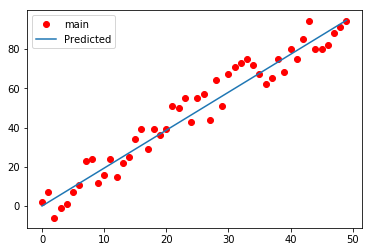

In [17]:
###############################
#### Evaluate and plot ########
###############################
Input_values = data[:,0]
Labels = data[:,1]
Prediction_values = data[:,0] * wcoeff + bias

# uncomment if plotting is desired!
plt.plot(Input_values, Labels, 'ro', label='main')
plt.plot(Input_values, Prediction_values, label='Predicted')

# Saving the result.
plt.legend()
plt.show()
plt.close()